# Лабораторная работа №2

## Тема: Алгоритмы классификации

Алгоритмы классификации в машинном обучении — это методы, которые обучаются на данных с известными категориями (метками) и затем предсказывают, к какому классу относятся новые, ранее не встречавшиеся объекты. Они анализируют признаки объектов (например, числовые или текстовые характеристики) и находят паттерны, позволяющие разделить их на заданные группы.

### Популярные алгоритмы классификации в машинном обучении


##### 1. Логистическая регрессия
- **Сильные стороны**: Простота реализации, интерпретируемость, эффективность для линейно разделимых данных.
- **Слабые стороны**: Слабо работает с нелинейными зависимостями, чувствительна к выбросам.

##### 2. Метод опорных векторов (SVM)
- **Сильные стороны**: Хорошо подходит для высокоразмерных данных, эффективен при четком разделении классов.
- **Слабые стороны**: Долгая обучение на больших данных, сложная интерпретация.
##### 3. K-ближайших соседей (k-NN)
- **Сильные стороны**: Простота, отсутствие этапа обучения, адаптивность к локальным паттернам.
- **Слабые стороны**: Высокая вычислительная нагрузка на больших данных, чувствительность к шуму.

##### 4. Наивный байесовский классификатор
- **Сильные стороны**: Быстрый, эффективен для текстовых данных, работает с высокоразмерными признаками.
- **Слабые стороны**: Сильное предположение о независимости признаков, что редко выполняется на практике.

##### 5. Деревья решений
- **Сильные стороны**: Простота интерпретации, обработка нелинейных зависимостей, работа с категориальными данными.
- **Слабые стороны**: Склонность к переобучению, нестабильность при небольших изменениях данных.

##### 6. Случайный лес (Random Forest)
- **Сильные стороны**: Высокая точность, устойчивость к переобучению, оценка важности признаков.
- **Слабые стороны**: Сложность интерпретации, высокая ресурсоемкость.

##### 7. Градиентный бустинг (Gradient Boosting)
- **Сильные стороны**: Высокая точность, гибкость в настройке, эффективность на разнородных данных.
- **Слабые стороны**: Долгое обучение, риск переобучения при шумных данных.

##### 8. Нейронные сети
- **Сильные стороны**: Универсальность, обработка сложных нелинейных зависимостей, автоматическое извлечение признаков
- **Слабые стороны**: Требовательность к данным и вычислительным ресурсам, сложность интерпретации.

### Задача 5. Классификация новостных статей:

- Набор данных: 20 Newsgroups dataset на sklearn.
- Предварительная обработка: векторизация текста/TF-IDF,
масштабирование, разделение данных на обучающие и тестовые.
- Модели: логистическая регрессия, SVM, случайный лес, градиентный
бустинг.
- Сравнение моделей: точность, матрица ошибок.
- Изучение и подбор гиперпараметров: GridSearchCV или
RandomizedSearchCV.
- Визуализация: важности признаков.

In [20]:
import warnings
warnings.filterwarnings('ignore')

##### Импорт необходимых библиотек

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

##### Загрузка и подготовка данных

In [22]:
newsgroups = fetch_20newsgroups(subset='all', random_state=0)

In [23]:
df = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})
df['category'] = df['target'].map(lambda x: newsgroups.target_names[x])

In [24]:
df.head()

,text,target,category
0,From: judy@cbnewsd.cb.att.com (judith.diehl)\n...,6,misc.forsale
1,From: raunoh@otol.fi (Rauno Haapaniemi)\nSubje...,1,comp.graphics
2,From: muirm@argon.gas.organpipe.uug.arizona.ed...,15,soc.religion.christian
3,From: ssa@unity.ncsu.edu (S. Alavi)\nSubject: ...,6,misc.forsale
4,From: matt@ra.oc.com (Matthew Lyle)\nSubject: ...,11,sci.crypt


In [25]:
print("Список всех целевых классов:")
print(newsgroups.target_names)

Список всех целевых классов:
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [26]:
selected_categories = ['alt.atheism', 'comp.graphics', 'sci.med']
selected_indices = [i for i, name in enumerate(newsgroups.target_names) if name in selected_categories]
df_filtered = df[df['target'].isin(selected_indices)].copy()
df_filtered['target'] = df_filtered['target'].apply(lambda x: selected_indices.index(x) if x in selected_indices else -1)

In [27]:
df_filtered.head()

,text,target,category
1,From: raunoh@otol.fi (Rauno Haapaniemi)\nSubje...,1,comp.graphics
5,From: ykim@cs.columbia.edu (Yong Su Kim)\nSubj...,1,comp.graphics
6,From: ae604@Freenet.carleton.ca (Michael Clark...,1,comp.graphics
11,From: acooper@mac.cc.macalstr.edu (Turin Turam...,0,alt.atheism
14,From: ski@wpi.WPI.EDU (Joseph Mich Krzeszewski...,2,sci.med


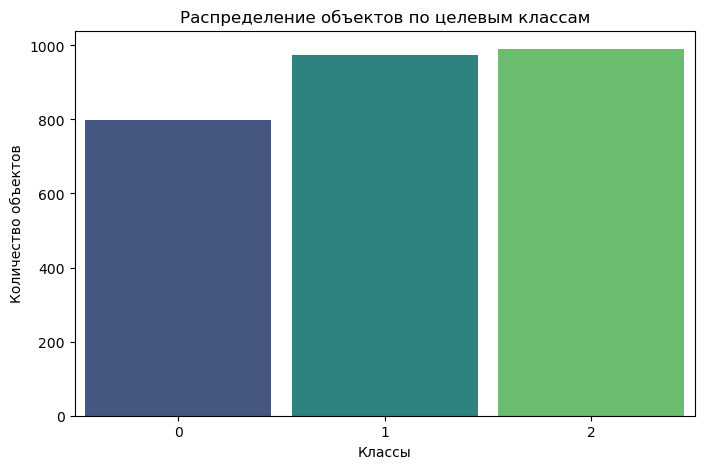

In [28]:
class_distribution = df_filtered['target'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis', width=0.9)
plt.title('Распределение объектов по целевым классам')
plt.xlabel('Классы')
plt.ylabel('Количество объектов')
plt.show()

In [29]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, max_features=10000)
x = vectorizer.fit_transform(df_filtered['text'])
y = df_filtered['target']

In [30]:
scaler = StandardScaler(with_mean=False)
x_scaled = scaler.fit_transform(x)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

##### Логистическая регрессия

In [32]:
param_dist = {
    'C': np.logspace(-3, 3, 100),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

In [33]:
log_reg = LogisticRegression(random_state=0)

In [34]:
random_search = RandomizedSearchCV(
    log_reg,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='f1_macro',
    random_state=0,
    # verbose=2
)

In [35]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
                   param_distributions={'C': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.3260334...
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
                                        'max_iter': [100, 500, 1000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=0, scoring='f1_macro')

In [36]:
print(f"Лучшие параметры: {random_search.best_params_}")

Лучшие параметры: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': np.float64(0.037649358067924674)}


In [37]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

In [38]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=selected_categories))



Classification Report:
               precision    recall  f1-score   support

  alt.atheism       1.00      0.96      0.98       141
comp.graphics       0.96      0.99      0.98       194
      sci.med       0.98      0.97      0.98       218

     accuracy                           0.98       553
    macro avg       0.98      0.98      0.98       553
 weighted avg       0.98      0.98      0.98       553



<Figure size 800x600 with 0 Axes>

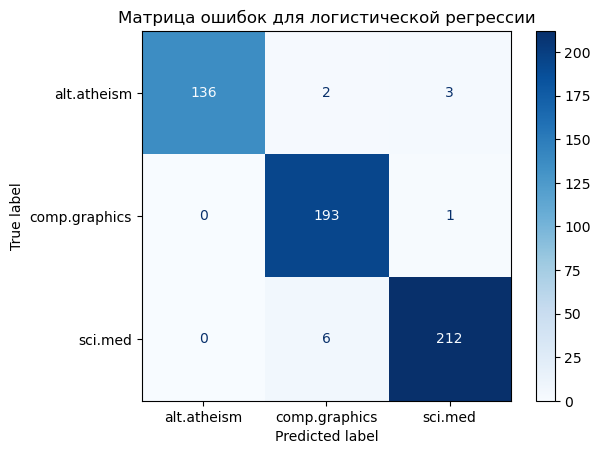

In [39]:
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    best_model,
    x_test,
    y_test,
    display_labels=selected_categories,
    cmap='Blues'
)
plt.title('Матрица ошибок для логистической регрессии')
plt.show()

##### SVM

In [40]:
param_dist = {
    'C': np.logspace(-3, 3, 100),
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'dual': [True, False],
    'max_iter': [1000, 5000]
}

In [41]:
svm = LinearSVC(random_state=0)

In [42]:
random_search = RandomizedSearchCV(
    svm,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='f1_macro',
    random_state=0
)

In [43]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=LinearSVC(random_state=0),
                   param_distributions={'C': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.0...
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
                                        'dual': [True, False],
                                        'loss': ['hinge', 'squared_hinge'],
                                        'max_iter': [1000, 5000],
                                        'penalty': ['l1', 'l2']},
                   random_state=0, scoring='f1_macro')

In [44]:
print(f"Лучшие параметры: {random_search.best_params_}")

Лучшие параметры: {'penalty': 'l2', 'max_iter': 5000, 'loss': 'hinge', 'dual': True, 'C': np.float64(1.4174741629268048)}


In [45]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

In [46]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=selected_categories))


Classification Report:
               precision    recall  f1-score   support

  alt.atheism       1.00      0.97      0.99       141
comp.graphics       0.96      0.99      0.98       194
      sci.med       0.98      0.97      0.98       218

     accuracy                           0.98       553
    macro avg       0.98      0.98      0.98       553
 weighted avg       0.98      0.98      0.98       553



<Figure size 800x600 with 0 Axes>

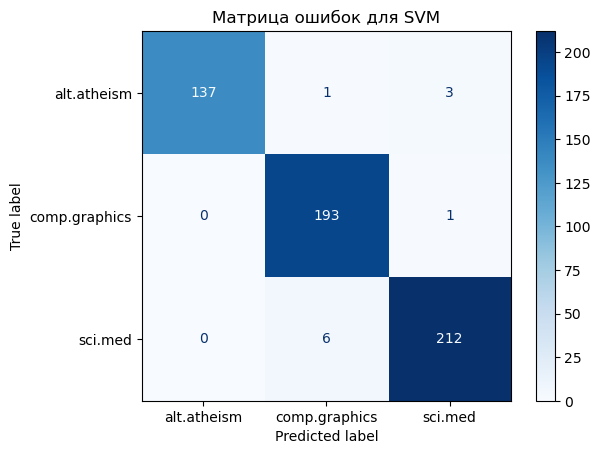

In [47]:
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    best_model,
    x_test,
    y_test,
    display_labels=selected_categories,
    cmap='Blues'
)
plt.title('Матрица ошибок для SVM')
plt.show()

##### Random forest

In [48]:
param_dist = {
    'n_estimators': [10, 20, 30],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [49]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1)

In [50]:
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='f1_macro',
    random_state=0
)

In [51]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30]},
                   random_state=0, scoring='f1_macro')

In [52]:
print(f"Лучшие параметры: {random_search.best_params_}")

Лучшие параметры: {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy'}


In [53]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

In [54]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=selected_categories))


Classification Report:
               precision    recall  f1-score   support

  alt.atheism       0.93      0.94      0.93       141
comp.graphics       0.80      0.97      0.88       194
      sci.med       0.96      0.78      0.86       218

     accuracy                           0.89       553
    macro avg       0.90      0.90      0.89       553
 weighted avg       0.90      0.89      0.89       553



<Figure size 800x600 with 0 Axes>

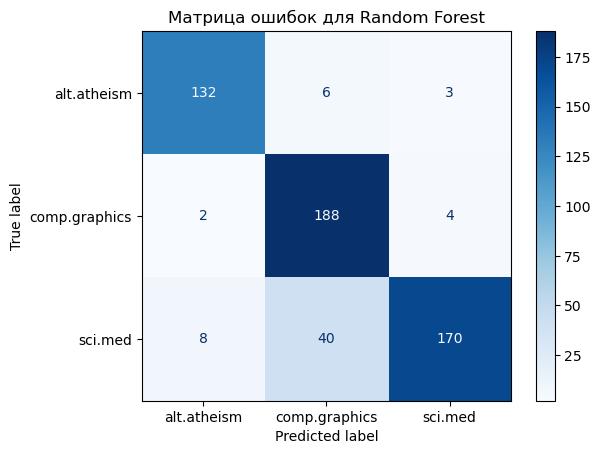

In [55]:
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    best_model,
    x_test,
    y_test,
    display_labels=selected_categories,
    cmap='Blues'
)
plt.title('Матрица ошибок для Random Forest')
plt.show()

##### Градиентный бустинг

In [56]:
param_dist = {
    'n_estimators': [10, 20, 30],
    'learning_rate': np.logspace(-3, 0, 100),
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2']
}

In [57]:
gb = GradientBoostingClassifier(random_state=0)

In [58]:
random_search = RandomizedSearchCV(
    gb,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='f1_macro',
    random_state=0,
    n_jobs=-1
)

In [59]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00...
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
                                        'max_depth': [3, 5, 7],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=0, scoring='f1_macro')

In [60]:
print(f"Лучшие параметры: {random_search.best_params_}")

Лучшие параметры: {'subsample': 0.9, 'n_estimators': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': np.float64(0.4328761281083057)}


In [61]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

In [62]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=selected_categories))


Classification Report:
               precision    recall  f1-score   support

  alt.atheism       1.00      0.95      0.97       141
comp.graphics       0.92      0.97      0.94       194
      sci.med       0.96      0.94      0.95       218

     accuracy                           0.95       553
    macro avg       0.96      0.95      0.96       553
 weighted avg       0.96      0.95      0.95       553



<Figure size 800x600 with 0 Axes>

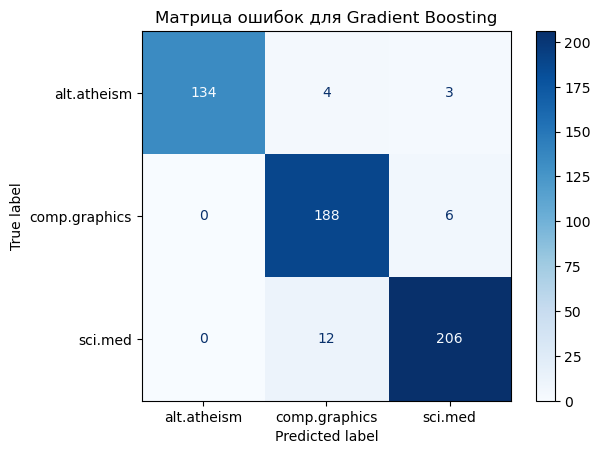

In [63]:
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    best_model,
    x_test,
    y_test,
    display_labels=selected_categories,
    cmap='Blues'
)
plt.title('Матрица ошибок для Gradient Boosting')
plt.show()

## Вывод:

В данном случае я хз какие выводы сделать. Подбор гиперпараметров значительно может повышать итоговый результат обучения модели. При большом количестве параметров лучше себя показывает рандомный подбор гиперпараметров за счёт более высокой скорости сходимости. Подбор сеткой лучше работает на небольших датасетах при сравнительно небольших количествах параметров. Есть и другие метод подбора, но их мы в рамках этой лр не рассматривали. Вообще по хорошему нужно было рандомный подбор ставить на 60+ повторений, но у меня 10, тк не хотелось долго ждать обучения. На этом датасете линейные методы алгоритмы машинного обучения показали более высокую точность, но могу предполрожить, что это может быть связано с недостаточным количеством повторений при подборе гиперпараметров.

## Список использованных источников:

- https://education.yandex.ru/handbook/ml
- https://scikit-learn.org/stable/user_guide.html